In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [75]:
df = pd.read_csv('D:\\Ботва\\Магистратура\\2сем\\ММО\\ЛАБ1\\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

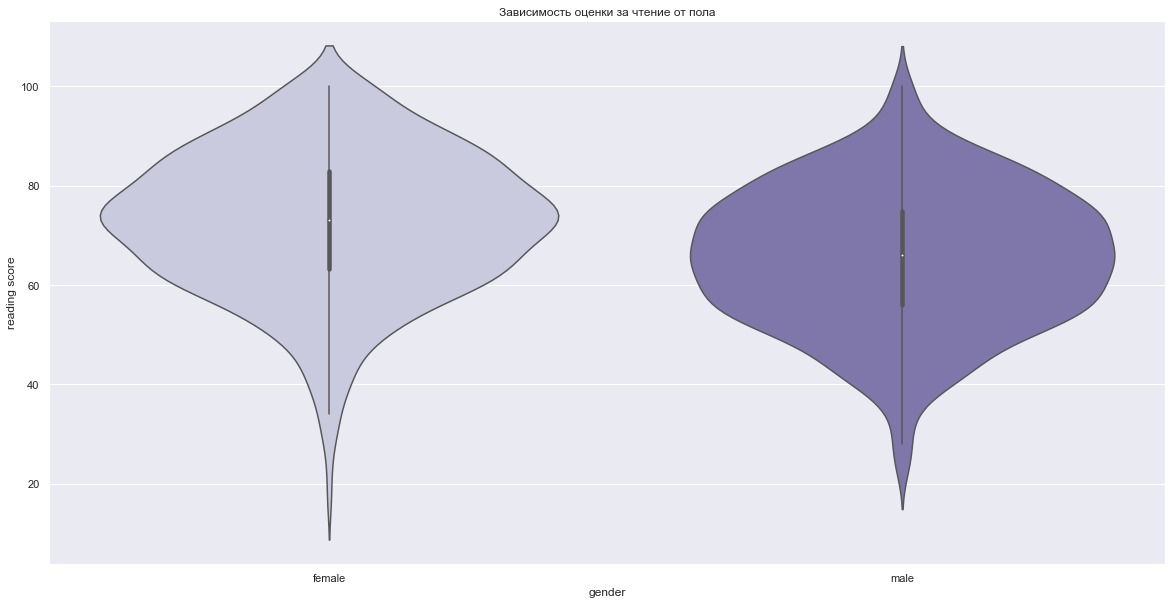

In [76]:
#1.Числовой тип. Скрипка
plt.figure(figsize=(20, 10))
ax = sns.violinplot(df['gender'], df['reading score'], palette="Purples")
ax.set(xlabel='gender', ylabel='reading score', title='Зависимость оценки за чтение от пола')
plt.plot()

In [77]:
#2.Категориальный и числовой тип. Heatmap
df_cat_num = df[['gender','test preparation course', 'math score', 'reading score', 'writing score']]

In [78]:
df_cat_num.loc[df['gender'] == 'male', 'gender'] = 1
df_cat_num.loc[df['gender'] == 'female', 'gender'] = 2
df_cat_num.loc[df['test preparation course'] == 'none', 'test preparation course'] = 1
df_cat_num.loc[df['test preparation course'] == 'completed', 'test preparation course'] = 2
df_cat_num['gender'] = pd.to_numeric(df_cat_num['gender'])
df_cat_num['test preparation course'] = pd.to_numeric(df_cat_num['test preparation course'])

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [79]:
df_cat_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   gender                   1000 non-null   int64
 1   test preparation course  1000 non-null   int64
 2   math score               1000 non-null   int64
 3   reading score            1000 non-null   int64
 4   writing score            1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


<AxesSubplot:>

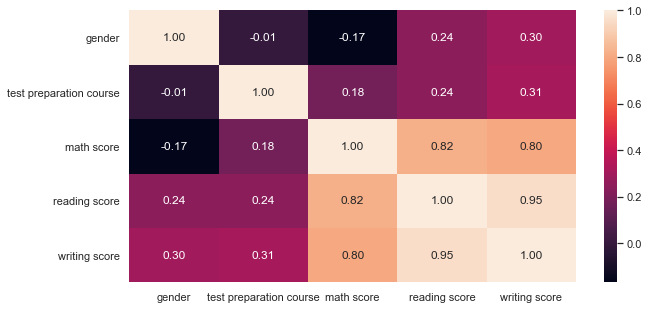

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_cat_num.corr(), annot=True, fmt='.2f')

In [81]:
#3.Категориальный тип. Network
df_cat = df[['gender','race/ethnicity']]

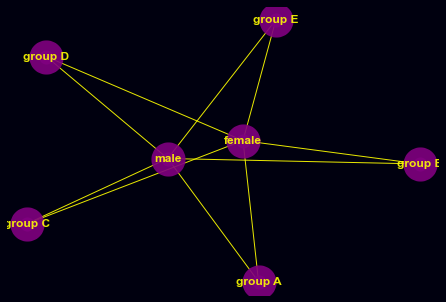

In [82]:
G=nx.from_pandas_edgelist(df_cat, 'gender', 'race/ethnicity')
fig = plt.figure()
nx.draw(G, with_labels=True, node_size=200, font_color="yellow", font_weight="bold", node_color="purple", alpha=0.9, edge_color='yellow', linewidths=20)
fig.set_facecolor("#00000F")
plt.show()

In [83]:
#4.Числовой тип. Density 2D
df_2d = df[['math score', 'writing score', 'reading score']]
x = df_2d['math score']
y = df_2d['writing score']
x1 = df_2d['reading score']

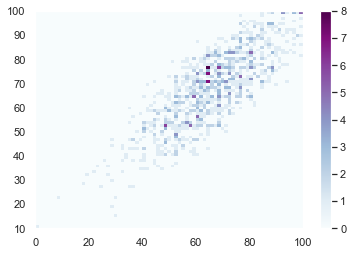

In [84]:
plt.hist2d(x, y, bins=(75, 75), cmap=plt.cm.BuPu)
plt.colorbar()
plt.show()

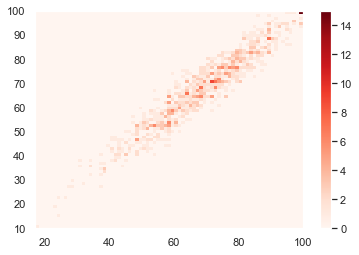

In [85]:
plt.hist2d(x1, y, bins=(75, 75), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

In [86]:
#5.Числовой тип. Density
df_den = df[['math score']]

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


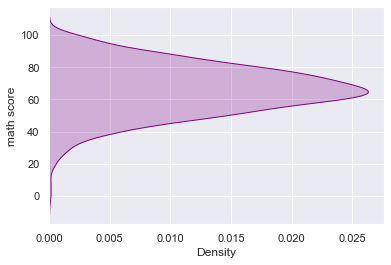

In [87]:
sns.set(style="darkgrid")
sns.kdeplot(df_den['math score'], shade=True, vertical=True, color="purple")
plt.show()